In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import load_breast_cancer
 # instantiating
cancer = load_breast_cancer(as_frame=True)
# creating dataframe
df = cancer.frame


## Input features
X = df[cancer['feature_names']]
print('Inputs Dataframe shape   :', X.shape)


Inputs Dataframe shape   : (569, 30)


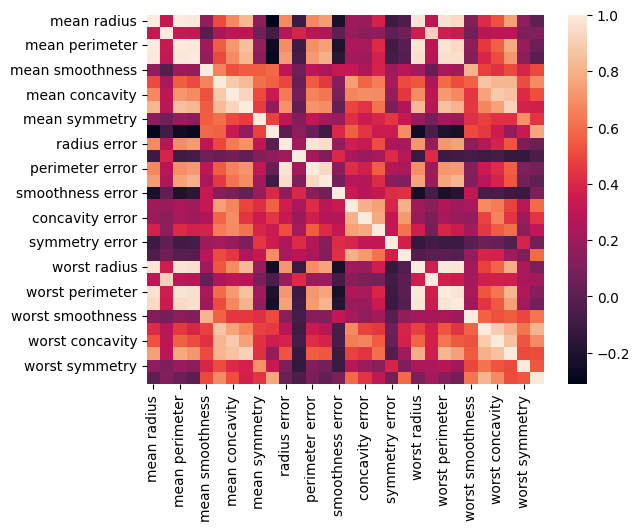

In [15]:
# Mean
X_mean = X.mean()
# Standard deviation
X_std = X.std() 
# Standardization
Z = (X - X_mean) / X_std

# covariance
c = Z.cov()


# Plot the covariance matrix
sns.heatmap(c)
plt.show()



In [16]:

eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Eigen values Shape: (30,)
Eigen Vector Shape: (30, 30)


In [17]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
 # Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]
 # sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]



explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [18]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var



array([0.44272026, 0.63243208, 0.72636371, 0.79238506, 0.84734274,
       0.88758796, 0.9100953 , 0.92598254, 0.93987903, 0.95156881,
       0.961366  , 0.97007138, 0.97811663, 0.98335029, 0.98648812,
       0.98915022, 0.99113018, 0.99288414, 0.9945334 , 0.99557204,
       0.99657114, 0.99748579, 0.99829715, 0.99889898, 0.99941502,
       0.99968761, 0.99991763, 0.99997061, 0.99999557, 1.        ])

In [19]:
n_components = np.argmax(explained_var >= 0.50) + 1
n_components

np.int64(2)

In [20]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u, index = cancer['feature_names'],columns = ['PC1','PC2'])


In [21]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
Z_pca = pd.DataFrame(Z_pca.values,columns = ['PCA1','PCA2'])
Z_pca.head()

,PCA1,PCA2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359


In [24]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Convert the scaled data into a DataFrame for easier analysis
scaled_data = pd.DataFrame(data_scaled, columns=data.columns)
# Display the standardized data
print(scaled_data.head())


from sklearn.decomposition import PCA
# Initialize PCA
pca = PCA()
# Fit PCA on the scaled data
pca.fit(data_scaled)
# Explained variance ratio for each principal component
print("Explained variance ratio for each principal component:")
print(pca.explained_variance_ratio_)
# Cumulative explained variance
print("\nCumulative explained variance:")
print(np.cumsum(pca.explained_variance_ratio_))


import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title('Explained Variance by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


# Cumulative explained variance plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


# Project the data onto the first two principal components
data_pca = pca.transform(data_scaled)
# Create a DataFrame with the first two principal components
pca_df = pd.DataFrame(data_pca[:, :2], columns=['PC1', 'PC2'])
# Visualize the data in 2D space using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c='red', edgecolors='k', alpha=0.7)
plt.title('PCA of Green Transportation System')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()




NameError: name 'data' is not defined